In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.style.use('ggplot')

In [2]:
os.chdir('C:\\Users\\user\\OneDrive\\바탕 화면\\이현방\\빅콘테스트\\Seafood_Import_Price_Prediction')

In [3]:
root = os.path.join(os.getcwd(), 'DATA')

In [4]:
train = pd.read_excel(os.path.join(root, 'train.xlsx')) 

train.columns = ['기준일','제품구분','제조국','수출국','수입용도','중분류명 카테고리','어종','상세어종','수입형태','평균단가($)']

train.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,평균단가($)
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [5]:
train = train.drop('제품구분',axis=1) # 1종류(수산물) 밖에 없는 수산물 컬럼 제거

In [6]:
'''
오징어,연어,흰다리새우 주요 수출국을 알아보고

해당 품목의 주요 수출국별 평균단가를 시각화하고 상관관계를 알아보자! 

그리고 각 데이터의 정상성도 확인해보자! (by 논문)
'''

'\n오징어,연어,흰다리새우 주요 수출국을 알아보고\n\n해당 품목의 주요 수출국별 평균단가를 시각화하고 상관관계를 알아보자! \n\n그리고 각 데이터의 정상성도 확인해보자! (by 논문)\n'

In [56]:
train['수출국'].unique()

array(['아르헨티나', '바레인', '칠레', '중국', '스페인', '프랑스', '인도네시아', '일본', '북한',
       '모로코', '멕시코', '말레이시아', '노르웨이', '페루', '러시아', '시에라리온', '세네갈', '태국',
       '튀니지', '벨리즈', '대만', '캐나다', '미국', '베트남', '남아프리카 공화국', '기니', '인도',
       '필리핀', '사우디아라비아', '뉴질랜드', '파키스탄', '아랍에미리트', '에콰도르', '네덜란드', '홍콩',
       '아일랜드', '터키', '아이슬란드', '모리타니', '세이셸', '영국', '오만', '호주', '불가리아',
       '독일', '키리바시', '기니비사우', '브라질', '스리랑카', '우루과이', '이란', '미얀마',
       '솔로몬 제도', '가나', '방글라데시', '파나마', '감비아', '크로아티아', '앙골라', '베네수엘라',
       '사모아', '파푸아뉴기니', '싱가포르', '포르투갈', '포클랜드 제도', '덴마크', '바누아투', '모잠비크',
       '이집트', '수리남', '몰타', '루마니아', '나미비아', '이탈리아', '기타(ZZ)', '그리스',
       '모리셔스', '미크로네시아 연방', '피지', '스웨덴', '팔라우', '투발루', '쿠바', '라이베리아',
       '마다가스카르', '지부티', '우크라이나', '콜롬비아'], dtype=object)

In [8]:
train[train['상세어종']=='오징어']['수출국'].value_counts()/sum(train[train['상세어종']=='오징어']['수출국'].value_counts()) 
# 오징어 수출국 점유율
#  페루,중국,칠레 3대장 (91%) -> 페루,중국,칠레 시점별 환율, 평균 수입 단가 추출 필요

페루           0.370233
중국           0.286977
칠레           0.261395
대만           0.028372
아르헨티나        0.020465
뉴질랜드         0.018140
러시아          0.003721
미국           0.002791
에콰도르         0.001860
일본           0.001395
우루과이         0.000930
베트남          0.000930
인도네시아        0.000930
남아프리카 공화국    0.000465
태국           0.000465
바누아투         0.000465
스페인          0.000465
Name: 수출국, dtype: float64

In [58]:
train[train['상세어종']=='오징어']['제조국'].value_counts()/sum(train[train['상세어종']=='오징어']['제조국'].value_counts()) 

페루       0.384186
중국       0.251163
칠레       0.250233
대만       0.028837
대한민국     0.026512
아르헨티나    0.026047
뉴질랜드     0.020465
러시아      0.003721
미국       0.002791
에콰도르     0.001860
바누아투     0.000930
베트남      0.000930
인도네시아    0.000930
우루과이     0.000930
나미비아     0.000465
Name: 제조국, dtype: float64

In [59]:
train[train['상세어종']=='연어']['제조국'].value_counts()/sum(train[train['상세어종']=='연어']['제조국'].value_counts()) 

노르웨이     0.858294
영국       0.080591
캐나다      0.034251
호주       0.008059
러시아      0.007388
미국       0.003358
칠레       0.002015
아이슬란드    0.002015
뉴질랜드     0.002015
아일랜드     0.001343
베트남      0.000672
Name: 제조국, dtype: float64

In [60]:
train[train['상세어종']=='흰다리새우']['제조국'].value_counts()/sum(train[train['상세어종']=='흰다리새우']['제조국'].value_counts()) 

베트남        0.391388
태국         0.284890
에콰도르       0.076125
말레이시아      0.073433
중국         0.061899
인도         0.039600
사우디아라비아    0.025375
인도네시아      0.022684
페루         0.018839
파나마        0.002691
필리핀        0.001538
콜롬비아       0.001538
Name: 제조국, dtype: float64

In [9]:
train[train['상세어종']=='연어']['수출국'].value_counts()/sum(train[train['상세어종']=='연어']['수출국'].value_counts()) 
# 연어 수출국 점유율
# 노르웨이 독점시장 (85%) ->  노르웨이 시점별 환율, 평균 수입단가 추출 필요

노르웨이     0.857623
영국       0.080591
캐나다      0.034251
호주       0.008059
러시아      0.007388
미국       0.002686
칠레       0.002015
아이슬란드    0.002015
뉴질랜드     0.002015
아일랜드     0.001343
베트남      0.001343
중국       0.000672
Name: 수출국, dtype: float64

In [10]:
train[train['상세어종']=='흰다리새우']['수출국'].value_counts()/sum(train[train['상세어종']=='흰다리새우']['수출국'].value_counts()) 
# 흰다리새우 수출국 점유율
# 베트남,태국 2대장 (60%) -> 베트남,태국 시점별 환율, 평균 수입단가 추출 필요

베트남        0.389466
태국         0.284890
에콰도르       0.076125
말레이시아      0.073433
중국         0.061899
인도         0.039600
사우디아라비아    0.025375
인도네시아      0.022684
페루         0.018839
파나마        0.002691
일본         0.001922
필리핀        0.001538
콜롬비아       0.001538
Name: 수출국, dtype: float64

In [11]:
'''
추세(trend)
데이터가 장기적으로 증가하거나 감소할 때, 추세(trend)가 존재합니다. 
추세가 선형적일 필요는 없습니다. 
때때로 어떤 추세가 증가에서 감소로 변화하는 경우에, 그것을 추세의 “방향이 변화했다”라고 언급할 것입니다. 

계절성(seasonality)
해마다 어떤 특정한 때나 1주일마다 특정 요일에 나타나는 것 같은 계절성 요인이 시계열에 영향을 줄 때 계절성(seasonality) 패턴이 나타납니다. 
계절성은 빈도의 형태로 나타나는데, 그 빈도는 항상 일정하며 알려져 있습니다. 
위의 당뇨병 약 월별 매출액에는 계절성이 나타나는데, 이 계절성은 부분적으로 연말에 발생하는 약품 가격 변동에 의한 것입니다.

주기성(cycle)
고정된 빈도가 아닌 형태로 증가나 감소하는 모습을 보일 때 주기(cycle)가 나타납니다. 
보통 이러한 요동은 경제 상황 때문에 일어나고, 흔히 “경기 순환(business cycle)”과 관련 있습니다.
보통 이러한 요동의 지속기간은 적어도 2년 이상입니다.
'''

'\n추세(trend)\n데이터가 장기적으로 증가하거나 감소할 때, 추세(trend)가 존재합니다. \n추세가 선형적일 필요는 없습니다. \n때때로 어떤 추세가 증가에서 감소로 변화하는 경우에, 그것을 추세의 “방향이 변화했다”라고 언급할 것입니다. \n\n계절성(seasonality)\n해마다 어떤 특정한 때나 1주일마다 특정 요일에 나타나는 것 같은 계절성 요인이 시계열에 영향을 줄 때 계절성(seasonality) 패턴이 나타납니다. \n계절성은 빈도의 형태로 나타나는데, 그 빈도는 항상 일정하며 알려져 있습니다. \n위의 당뇨병 약 월별 매출액에는 계절성이 나타나는데, 이 계절성은 부분적으로 연말에 발생하는 약품 가격 변동에 의한 것입니다.\n\n주기성(cycle)\n고정된 빈도가 아닌 형태로 증가나 감소하는 모습을 보일 때 주기(cycle)가 나타납니다. \n보통 이러한 요동은 경제 상황 때문에 일어나고, 흔히 “경기 순환(business cycle)”과 관련 있습니다.\n보통 이러한 요동의 지속기간은 적어도 2년 이상입니다.\n'

In [12]:
all_squid_price = train[train['상세어종']=='오징어'].groupby(by='기준일').mean()['평균단가($)'] # 전체 오징어 평균단가
peru_squid_price = train[train['상세어종']=='오징어'][train['수출국']=='페루'].groupby(by='기준일').mean()['평균단가($)'] # 페루 오징어 평균단가
china_squid_price = train[train['상세어종']=='오징어'][train['수출국']=='중국'].groupby(by='기준일').mean()['평균단가($)'] # 중국 오징어 평균단가
chile_squid_price = train[train['상세어종']=='오징어'][train['수출국']=='칠레'].groupby(by='기준일').mean()['평균단가($)'] # 칠레 오징어 평균단가

<ipython-input-12-c0fe2aa418a1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peru_squid_price = train[train['상세어종']=='오징어'][train['수출국']=='페루'].groupby(by='기준일').mean()['평균단가($)'] # 페루 오징어 평균단가
<ipython-input-12-c0fe2aa418a1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  china_squid_price = train[train['상세어종']=='오징어'][train['수출국']=='중국'].groupby(by='기준일').mean()['평균단가($)'] # 중국 오징어 평균단가
<ipython-input-12-c0fe2aa418a1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chile_squid_price = train[train['상세어종']=='오징어'][train['수출국']=='칠레'].groupby(by='기준일').mean()['평균단가($)'] # 칠레 오징어 평균단가


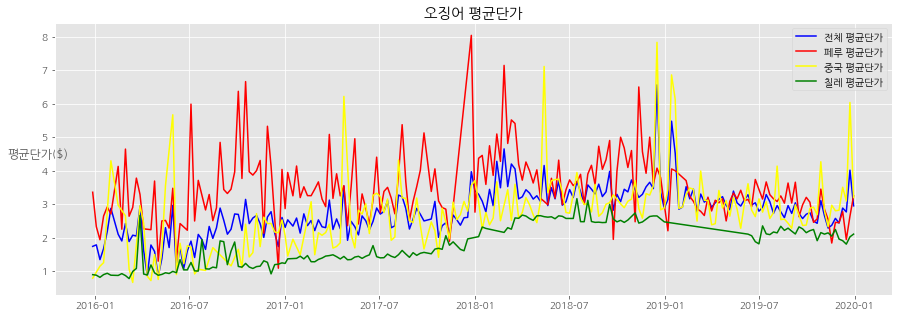

In [13]:
plt.figure(figsize=(15,5))

plt.title('오징어 평균단가')

plt.plot(all_squid_price,color='blue',label='전체 평균단가')
plt.plot(peru_squid_price,color='red',label='페루 평균단가')
plt.plot(china_squid_price,color='yellow',label='중국 평균단가')
plt.plot(chile_squid_price,color='green',label='칠레 평균단가')

plt.legend(loc='best')
plt.ylabel('평균단가($)',rotation=0)

plt.show()

In [14]:
# 오징어 평균단가는 주요 수출국들(페루,중국,칠레)의 평균단가와 높은 상관관계를 가지는 듯함. (올라갈때 같이 올라가고 내려갈때 같이 내려감)

In [15]:
pd.DataFrame({'all':all_squid_price,
             'peru':peru_squid_price,
             'china':china_squid_price,
             'chile':chile_squid_price}).corr()

# 실제로 오징어 평균단가는 페루,중국,칠레 평균단가와 높은 상관관계를 띄고 있음.

,all,peru,china,chile
all,1.000000,0.510630,0.785898,0.727521
peru,0.510630,1.000000,0.109155,0.238574
china,0.785898,0.109155,1.000000,0.501766
chile,0.727521,0.238574,0.501766,1.000000


In [16]:
all_squid_count = train[train['상세어종']=='오징어'].groupby(by='기준일')['상세어종'].count() # 전체 오징어 수입량
peru_squid_count = train[train['상세어종']=='오징어'][train['수출국']=='페루'].groupby(by='기준일')['상세어종'].count() # 페루 오징어 수입량
china_squid_count = train[train['상세어종']=='오징어'][train['수출국']=='중국'].groupby(by='기준일')['상세어종'].count() # 중국 오징어 수입량
chile_squid_count = train[train['상세어종']=='오징어'][train['수출국']=='칠레'].groupby(by='기준일')['상세어종'].count() # 칠레 오징어 수입량

<ipython-input-16-d865d2b01de0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peru_squid_count = train[train['상세어종']=='오징어'][train['수출국']=='페루'].groupby(by='기준일')['상세어종'].count() # 페루 오징어 수입량
<ipython-input-16-d865d2b01de0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  china_squid_count = train[train['상세어종']=='오징어'][train['수출국']=='중국'].groupby(by='기준일')['상세어종'].count() # 중국 오징어 수입량
<ipython-input-16-d865d2b01de0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chile_squid_count = train[train['상세어종']=='오징어'][train['수출국']=='칠레'].groupby(by='기준일')['상세어종'].count() # 칠레 오징어 수입량


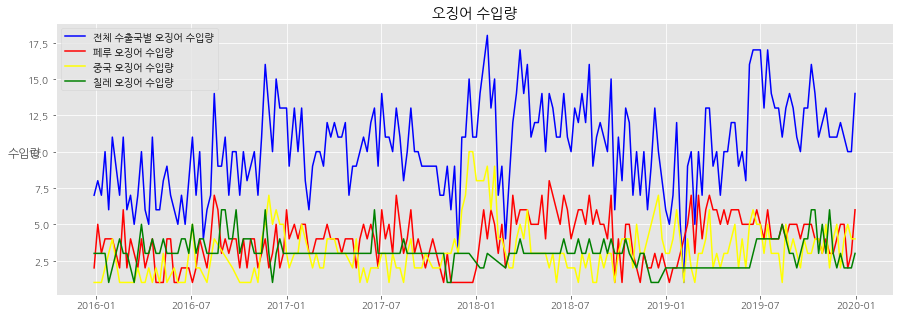

In [17]:
plt.figure(figsize=(15,5))

plt.title('오징어 수입량')

plt.plot(all_squid_count,color='blue',label='전체 수출국별 오징어 수입량')
plt.plot(peru_squid_count,color='red',label='페루 오징어 수입량')
plt.plot(china_squid_count,color='yellow',label='중국 오징어 수입량')
plt.plot(chile_squid_count,color='green',label='칠레 오징어 수입량')


plt.legend(loc='best')
plt.ylabel('수입량',rotation=0)

plt.show()

In [18]:
# 오징어 수입량 주요 수출국들(페루,중국,칠레)의 수입량과 어느정도 상관관계를 보이는 듯함. 특히, 페루와 높은 상관관계를 보이는 듯함.

In [19]:
pd.DataFrame({'all':all_squid_count,
             'peru':peru_squid_count,
             'china':china_squid_count,
             'chile':chile_squid_count}).corr()

# 실제로 오징어 수입량은 페루,중국 수입량과 높은 상관관계를 띄고 있음.
# 칠레는 상대적으로 낮은 상관관계

,all,peru,china,chile
all,1.000000,0.619937,0.529920,0.227335
peru,0.619937,1.000000,0.053783,0.100801
china,0.529920,0.053783,1.000000,-0.190133
chile,0.227335,0.100801,-0.190133,1.000000


In [20]:
pd.DataFrame({'all':all_squid_price,
             'peru':peru_squid_count,
             'china':china_squid_count,
             'chile':chile_squid_count}).corr()

,all,peru,china,chile
all,1.000000,0.192559,0.300330,-0.158875
peru,0.192559,1.000000,0.053783,0.100801
china,0.300330,0.053783,1.000000,-0.190133
chile,-0.158875,0.100801,-0.190133,1.000000


In [21]:
from statsmodels.tsa.stattools import adfuller # 시계열 정상성 확인 (단위근 검정)
import statsmodels.api as sm

In [22]:
def adf_test(y):
    print("Results of Augmented Dickey-Fuller test:")
    dftest = adfuller(y,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['test statistic','p-value','# of lags','# of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [23]:
adf_test(all_squid_price) # p-value가 0.05보다 크므로 귀무가설 기각 못함 -> 정상성 만족 x -> 로그 변환 혹은 차분 필요

Results of Augmented Dickey-Fuller test:
test statistic           -2.282189
p-value                   0.177777
# of lags                 4.000000
# of observations       203.000000
Critical Value (1%)      -3.462980
Critical Value (5%)      -2.875885
Critical Value (10%)     -2.574416
dtype: float64


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


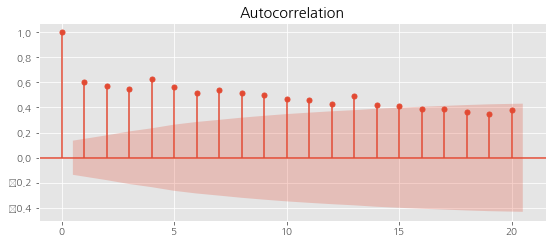

In [24]:
# ACF 그래프 (정상성 확인)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(all_squid_price,lags=20,ax=ax1) # 0으로 느리게 감소 -> 정상성 만족 x -> 로그 변환 혹은 차분 필요

In [25]:
adf_test(peru_squid_price) # p-value가 0.05보다 크므로 귀무가설 기각 못함 -> 정상성 만족 x -> 로그 변환 혹은 차분 필요

Results of Augmented Dickey-Fuller test:
test statistic           -2.834459
p-value                   0.053518
# of lags                14.000000
# of observations       182.000000
Critical Value (1%)      -3.466800
Critical Value (5%)      -2.877555
Critical Value (10%)     -2.575308
dtype: float64


In [26]:
adf_test(china_squid_price) # p-value가 0.05보다 크므로 귀무가설 기각 못함 -> 정상성 만족 x -> 로그 변환 혹은 차분 필요

Results of Augmented Dickey-Fuller test:
test statistic           -2.852497
p-value                   0.051157
# of lags                 4.000000
# of observations       188.000000
Critical Value (1%)      -3.465620
Critical Value (5%)      -2.877040
Critical Value (10%)     -2.575032
dtype: float64


In [27]:
adf_test(chile_squid_price) # p-value가 0.05보다 크므로 귀무가설 기각 못함 -> 정상성 만족 x -> 로그 변환 혹은 차분 필요

Results of Augmented Dickey-Fuller test:
test statistic           -1.817471
p-value                   0.371823
# of lags                 2.000000
# of observations       173.000000
Critical Value (1%)      -3.468726
Critical Value (5%)      -2.878396
Critical Value (10%)     -2.575756
dtype: float64


In [28]:
adf_test(all_squid_count) # p-value가 0.05보다 작으므로 귀무가설 기각 -> 정상성 만족

Results of Augmented Dickey-Fuller test:
test statistic           -5.496217
p-value                   0.000002
# of lags                 1.000000
# of observations       206.000000
Critical Value (1%)      -3.462499
Critical Value (5%)      -2.875675
Critical Value (10%)     -2.574304
dtype: float64


In [29]:
adf_test(peru_squid_count) # p-value가 0.05보다 작으므로 귀무가설 기각 -> 정상성 만족

Results of Augmented Dickey-Fuller test:
test statistic           -3.474553
p-value                   0.008665
# of lags                 3.000000
# of observations       193.000000
Critical Value (1%)      -3.464694
Critical Value (5%)      -2.876635
Critical Value (10%)     -2.574816
dtype: float64


In [30]:
adf_test(china_squid_count) # p-value가 0.05보다 작으므로 귀무가설 기각 -> 정상성 만족

Results of Augmented Dickey-Fuller test:
test statistic           -4.442649
p-value                   0.000249
# of lags                 1.000000
# of observations       191.000000
Critical Value (1%)      -3.465059
Critical Value (5%)      -2.876794
Critical Value (10%)     -2.574901
dtype: float64


In [31]:
adf_test(chile_squid_count) # p-value가 0.05보다 작으므로 귀무가설 기각 -> 정상성 만족

Results of Augmented Dickey-Fuller test:
test statistic           -5.177519
p-value                   0.000010
# of lags                 2.000000
# of observations       173.000000
Critical Value (1%)      -3.468726
Critical Value (5%)      -2.878396
Critical Value (10%)     -2.575756
dtype: float64


In [32]:
all_salmon_price = train[train['상세어종']=='연어'].groupby(by='기준일').mean()['평균단가($)'] # 전체 연어 평균단가
norway_salmon_price = train[train['상세어종']=='연어'][train['수출국']=='노르웨이'].groupby(by='기준일').mean()['평균단가($)'] # 노르웨이 연어 평균단가

<ipython-input-32-3f27a091a998>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norway_salmon_price = train[train['상세어종']=='연어'][train['수출국']=='노르웨이'].groupby(by='기준일').mean()['평균단가($)'] # 노르웨이 연어 평균단가


<ipython-input-33-31e1906de3f3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(train[train['상세어종']=='연어'][train['수출국']=='노르웨이'].groupby(by='기준일').mean(),color='red',label='노르웨이 평균단가')


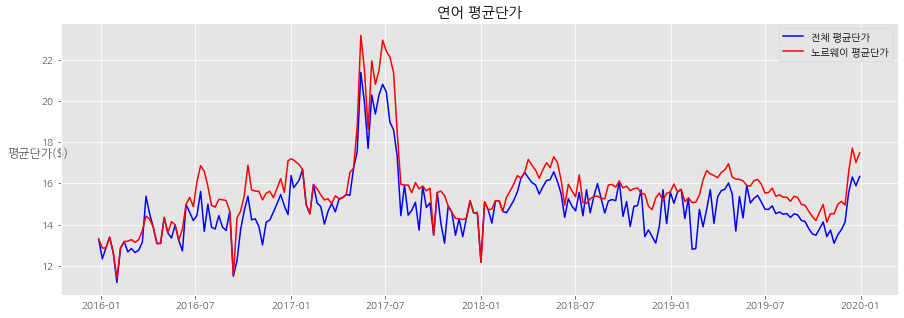

In [33]:
plt.figure(figsize=(15,5))

plt.title('연어 평균단가')

plt.plot(all_salmon_price,color='blue',label='전체 평균단가')
plt.plot(train[train['상세어종']=='연어'][train['수출국']=='노르웨이'].groupby(by='기준일').mean(),color='red',label='노르웨이 평균단가')

plt.legend(loc='best')
plt.ylabel('평균단가($)',rotation=0)

plt.show()

In [34]:
pd.DataFrame({'all':all_salmon_price,
             'norway':norway_salmon_price
             }).corr()

,all,norway
all,1.000000,0.917461
norway,0.917461,1.000000


In [35]:
adf_test(all_salmon_price) # p-value가 0.05보다 작으므로 귀무가설 기각 -> 정상성 만족

Results of Augmented Dickey-Fuller test:
test statistic           -3.402312
p-value                   0.010880
# of lags                 3.000000
# of observations       206.000000
Critical Value (1%)      -3.462499
Critical Value (5%)      -2.875675
Critical Value (10%)     -2.574304
dtype: float64


In [36]:
adf_test(norway_salmon_price) # p-value가 0.05보다 작으므로 귀무가설 기각 -> 정상성 만족

Results of Augmented Dickey-Fuller test:
test statistic           -3.414652
p-value                   0.010469
# of lags                 3.000000
# of observations       206.000000
Critical Value (1%)      -3.462499
Critical Value (5%)      -2.875675
Critical Value (10%)     -2.574304
dtype: float64


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


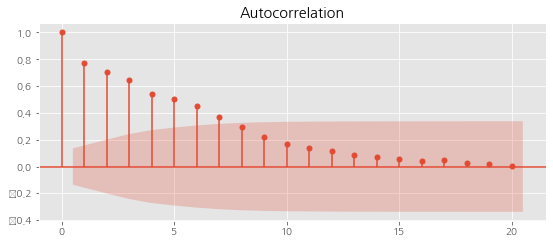

In [37]:
# ACF 그래프 (정상성 확인)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(all_salmon_price,lags=20,ax=ax1) # 0으로 빠르게 감소 --> 정상성 만족

In [38]:
all_salmon_count = train[train['상세어종']=='연어'].groupby(by='기준일')['상세어종'].count() # 전체 연어 수입량
norway_salmon_count = train[train['상세어종']=='연어'][train['수출국']=='노르웨이'].groupby(by='기준일')['상세어종'].count() # 노르웨이 연어 수입량

<ipython-input-38-9221fa8ba8a7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norway_salmon_count = train[train['상세어종']=='연어'][train['수출국']=='노르웨이'].groupby(by='기준일')['상세어종'].count() # 노르웨이 연어 수입량


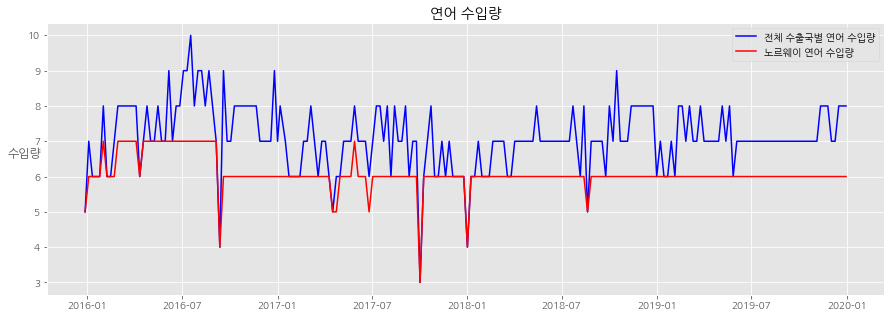

In [39]:
plt.figure(figsize=(15,5))

plt.title('연어 수입량')

plt.plot(all_salmon_count,color='blue',label='전체 수출국별 연어 수입량')
plt.plot(norway_salmon_count,color='red',label='노르웨이 연어 수입량')

plt.legend(loc='best')
plt.ylabel('수입량',rotation=0)

plt.show()

In [40]:
pd.DataFrame({'all':all_salmon_count,
             'norway':norway_salmon_count
             }).corr()

,all,norway
all,1.000000,0.637471
norway,0.637471,1.000000


In [41]:
pd.DataFrame({'all':all_salmon_price,
             'norway':norway_salmon_count
             }).corr()

,all,norway
all,1.000000,-0.102401
norway,-0.102401,1.000000


In [42]:
adf_test(all_salmon_count) # p-value가 0.05보다 작으므로 귀무가설 기각 -> 정상성 만족

Results of Augmented Dickey-Fuller test:
test statistic           -5.075966
p-value                   0.000016
# of lags                 2.000000
# of observations       207.000000
Critical Value (1%)      -3.462342
Critical Value (5%)      -2.875606
Critical Value (10%)     -2.574267
dtype: float64


In [43]:
adf_test(norway_salmon_count) # p-value가 0.05보다 크므로 귀무가설 기각 x -> 정상성 만족 x --> 로그 변환 or 차분 필요

Results of Augmented Dickey-Fuller test:
test statistic           -2.509735
p-value                   0.113124
# of lags                 6.000000
# of observations       203.000000
Critical Value (1%)      -3.462980
Critical Value (5%)      -2.875885
Critical Value (10%)     -2.574416
dtype: float64


<ipython-input-44-a7a34cb37339>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(train[train['상세어종']=='흰다리새우'][train['수출국']=='베트남'].groupby(by='기준일').mean(),color='red',label='베트남 평균단가')
<ipython-input-44-a7a34cb37339>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(train[train['상세어종']=='흰다리새우'][train['수출국']=='태국'].groupby(by='기준일').mean(),color='yellow',label='태국 평균단가')


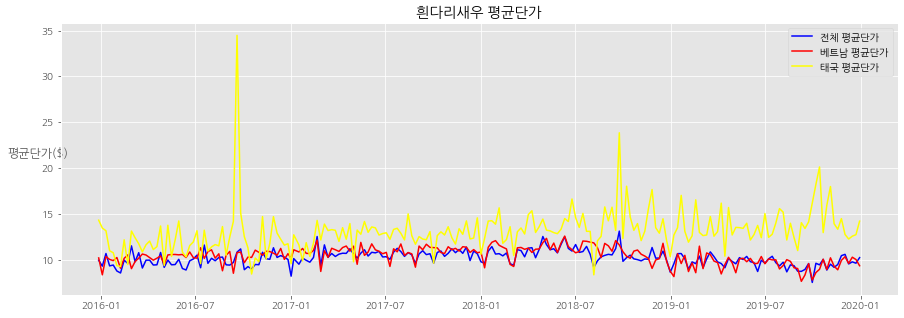

In [44]:
plt.figure(figsize=(15,5))

plt.title('흰다리새우 평균단가')

plt.plot(train[train['상세어종']=='흰다리새우'].groupby(by='기준일').mean(),color='blue',label='전체 평균단가')
plt.plot(train[train['상세어종']=='흰다리새우'][train['수출국']=='베트남'].groupby(by='기준일').mean(),color='red',label='베트남 평균단가')
plt.plot(train[train['상세어종']=='흰다리새우'][train['수출국']=='태국'].groupby(by='기준일').mean(),color='yellow',label='태국 평균단가')

plt.legend(loc='best')
plt.ylabel('평균단가($)',rotation=0)

plt.show()

In [45]:
all_Whiteleg_shrimp_price = train[train['상세어종']=='흰다리새우'].groupby(by='기준일').mean()['평균단가($)'] # 전체 흰다리새우 평균단가
vitenam_Whiteleg_shrimp_price = train[train['상세어종']=='흰다리새우'][train['수출국']=='베트남'].groupby(by='기준일').mean()['평균단가($)'] # 베트남 흰다리새우 평균단가
thai_Whiteleg_shrimp_price = train[train['상세어종']=='흰다리새우'][train['수출국']=='태국'].groupby(by='기준일').mean()['평균단가($)'] # 태국 흰다리새우 평균단가

<ipython-input-45-e4d19c0a811d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vitenam_Whiteleg_shrimp_price = train[train['상세어종']=='흰다리새우'][train['수출국']=='베트남'].groupby(by='기준일').mean()['평균단가($)'] # 베트남 흰다리새우 평균단가
<ipython-input-45-e4d19c0a811d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  thai_Whiteleg_shrimp_price = train[train['상세어종']=='흰다리새우'][train['수출국']=='태국'].groupby(by='기준일').mean()['평균단가($)'] # 태국 흰다리새우 평균단가


In [46]:
train[train['상세어종']=='흰다리새우']

,기준일,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,평균단가($)
8,2015-12-28,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.202863
9,2015-12-28,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살",6.972132
28,2015-12-28,페루,페루,판매용,갑각류,새우,흰다리새우,냉동,6.100000
36,2015-12-28,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",13.377047
37,2015-12-28,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살",15.050566
...,...,...,...,...,...,...,...,...,...
41976,2019-12-30,말레이시아,말레이시아,판매용,갑각류,새우,흰다리새우,냉동,7.682474
41980,2019-12-30,태국,태국,판매용,갑각류,새우,흰다리새우,냉장,11.500000
42005,2019-12-30,에콰도르,에콰도르,판매용,갑각류,새우,흰다리새우,냉동,6.739527
42023,2019-12-30,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.701577


In [47]:
pd.DataFrame({'all':all_Whiteleg_shrimp_price,
             'vitenam':vitenam_Whiteleg_shrimp_price,
              'thai':thai_Whiteleg_shrimp_price
             }).corr() # 상대적으로 태국은 평균단가에 영향을 끼치지 못하는듯.. 

,all,vitenam,thai
all,1.000000,0.645756,0.378097
vitenam,0.645756,1.000000,-0.017934
thai,0.378097,-0.017934,1.000000


In [48]:
all_Whiteleg_shrimp_count = train[train['상세어종']=='흰다리새우'].groupby(by='기준일')['상세어종'].count() # 전체 흰다리새우 수입량
vitenam_Whiteleg_shrimp_count = train[train['상세어종']=='흰다리새우'][train['수출국']=='베트남'].groupby(by='기준일')['상세어종'].count() # 베트남 흰다리새우 수입량
thai_Whiteleg_shrimp_count = train[train['상세어종']=='흰다리새우'][train['수출국']=='태국'].groupby(by='기준일')['상세어종'].count() # 태국 흰다리새우 수입량

<ipython-input-48-c2da1a40323f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vitenam_Whiteleg_shrimp_count = train[train['상세어종']=='흰다리새우'][train['수출국']=='베트남'].groupby(by='기준일')['상세어종'].count() # 베트남 흰다리새우 수입량
<ipython-input-48-c2da1a40323f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  thai_Whiteleg_shrimp_count = train[train['상세어종']=='흰다리새우'][train['수출국']=='태국'].groupby(by='기준일')['상세어종'].count() # 태국 흰다리새우 수입량


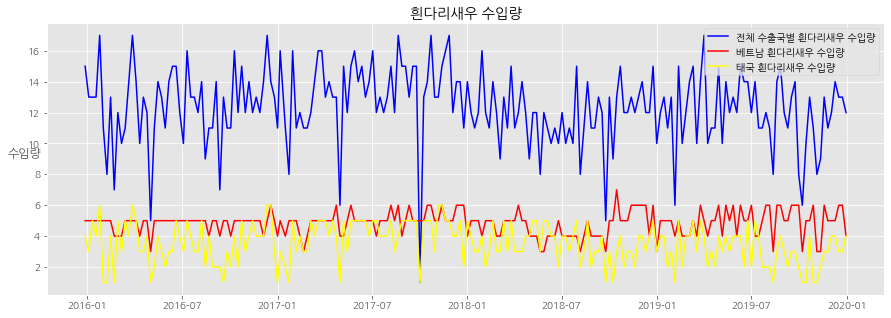

In [49]:
plt.figure(figsize=(15,5))

plt.title('흰다리새우 수입량')

plt.plot(all_Whiteleg_shrimp_count ,color='blue',label='전체 수출국별 흰다리새우 수입량')
plt.plot(vitenam_Whiteleg_shrimp_count ,color='red',label='베트남 흰다리새우 수입량')
plt.plot(thai_Whiteleg_shrimp_count,color='yellow',label='태국 흰다리새우 수입량')


plt.legend(loc='best')
plt.ylabel('수입량',rotation=0)

plt.show()

In [50]:
pd.DataFrame({'all':all_Whiteleg_shrimp_count,
             'vitenam':vitenam_Whiteleg_shrimp_count,
              'thai':thai_Whiteleg_shrimp_count
             }).corr()

,all,vitenam,thai
all,1.000000,0.490309,0.703371
vitenam,0.490309,1.000000,0.195590
thai,0.703371,0.195590,1.000000


In [51]:
pd.DataFrame({'all':all_Whiteleg_shrimp_price,
             'vitenam':vitenam_Whiteleg_shrimp_count,
              'thai':thai_Whiteleg_shrimp_count
             }).corr()

,all,vitenam,thai
all,1.000000,-0.058519,0.359433
vitenam,-0.058519,1.000000,0.195590
thai,0.359433,0.195590,1.000000


In [52]:
#### 환율 데이터 전처리 #####

In [57]:
exchange_vit = pd.read_csv(os.path.join(root,'\\환율\\VND_USD 내역 (베트남).csv'),encoding='UTF-8') 
exchange_vit # 2015~2019년 베트남 환율

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\환율\\VND_USD 내역 (베트남).csv'

In [ ]:
exchange_vit['날짜'] = exchange_vit['날짜'].str.replace('년 ','-')
exchange_vit['날짜'] = exchange_vit['날짜'].str.replace('월 ','-')
exchange_vit['날짜'] = exchange_vit['날짜'].str.replace('일','')

exchange_vit['날짜'] = exchange_vit['날짜'].astype('datetime64')
exchange_vit_7 = exchange_vit.query('날짜.dt.dayofweek == 0')

exchange_vit_7 = exchange_vit_7[['날짜','종가']]

exchange_vit_7 = exchange_vit_7.sort_index(ascending=False)

exchange_vit_7

In [ ]:
len(train['기준일'].unique())

In [ ]:
len(exchange_vit_7['날짜'].unique()) # 결측치 일부 존재 -> 결측치 처리 필요할 듯

In [ ]:
exchange_vit_7.to_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\exchange_vit_7.csv")

In [ ]:
exchange_thai = pd.read_csv(os.path.join(root,'THB_USD 내역 (태국).csv'),encoding='utf-8') 
exchange_thai # 2015~2019년 태국 환율

In [ ]:
exchange_thai['날짜'] = exchange_thai['날짜'].str.replace('년 ','-')
exchange_thai['날짜'] = exchange_thai['날짜'].str.replace('월 ','-')
exchange_thai['날짜'] = exchange_thai['날짜'].str.replace('일','')

exchange_thai['날짜'] = exchange_thai['날짜'].astype('datetime64')
exchange_thai_7 = exchange_thai.query('날짜.dt.dayofweek == 0')

exchange_thai_7 = exchange_thai_7[['날짜','종가']]

exchange_thai_7 = exchange_thai_7.sort_index(ascending=False)

exchange_thai_7

In [ ]:
len(exchange_thai_7['날짜'].unique()) # 결측치 없음.

In [ ]:
exchange_thai_7.to_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\exchange_thai_7.csv")

In [ ]:
exchange_peru = pd.read_csv(os.path.join(root,'PEN_USD 내역 (페루).csv'),encoding='utf-8') 
exchange_peru # 2015~2019년 페루 환율

In [ ]:
exchange_peru['날짜'] = exchange_peru['날짜'].str.replace('년 ','-')
exchange_peru['날짜'] = exchange_peru['날짜'].str.replace('월 ','-')
exchange_peru['날짜'] = exchange_peru['날짜'].str.replace('일','')

exchange_peru['날짜'] = exchange_peru['날짜'].astype('datetime64')
exchange_peru_7 = exchange_peru.query('날짜.dt.dayofweek == 0')

exchange_peru_7 = exchange_peru_7[['날짜','종가']]

exchange_peru_7 = exchange_peru_7.sort_index(ascending=False)

exchange_peru_7

In [ ]:
len(exchange_peru_7['날짜'].unique()) # 결측치 없음

In [ ]:
exchange_peru_7.to_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\exchange_peru_7.csv")

In [ ]:
exchange_nor = pd.read_csv(os.path.join(root,'NOK_USD 내역 (노르웨이).csv'),encoding='utf-8') 
exchange_nor # 2015~2019년 노르웨이 환율

In [ ]:
exchange_nor['날짜'] = exchange_nor['날짜'].str.replace('년 ','-')
exchange_nor['날짜'] = exchange_nor['날짜'].str.replace('월 ','-')
exchange_nor['날짜'] = exchange_nor['날짜'].str.replace('일','')

exchange_nor['날짜'] = exchange_nor['날짜'].astype('datetime64')

exchange_nor_7 = exchange_nor.query('날짜.dt.dayofweek == 0')

exchange_nor_7 = exchange_nor_7[['날짜','종가']]

exchange_nor_7 = exchange_nor_7.sort_index(ascending=False)

exchange_nor_7

In [ ]:
len(exchange_nor_7['날짜'].unique()) # 결측치 없음

In [ ]:
exchange_nor_7.to_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\exchange_nor_7.csv")

In [ ]:
exchange_chn = pd.read_csv(os.path.join(root,'CNY_USD 내역 (중국).csv'),encoding='utf-8') 
exchange_chn # 2015~2019년 중국 환율

In [ ]:
exchange_chn['날짜'] = exchange_chn['날짜'].str.replace('년 ','-')
exchange_chn['날짜'] = exchange_chn['날짜'].str.replace('월 ','-')
exchange_chn['날짜'] = exchange_chn['날짜'].str.replace('일','')

exchange_chn['날짜'] = exchange_chn['날짜'].astype('datetime64')

exchange_chn_7 = exchange_chn.query('날짜.dt.dayofweek == 0')
exchange_chn_7 = exchange_chn_7[['날짜','종가']]

exchange_chn_7 = exchange_chn_7.sort_index(ascending=False)

exchange_chn_7

In [ ]:
len(exchange_chn_7['날짜'].unique()) # 결측치 없음.

In [ ]:
exchange_chn_7.to_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\exchange_chn_7.csv")

In [ ]:
exchange_chile = pd.read_csv(os.path.join(root,'CLP_USD 내역 (칠레).csv'),encoding='utf-8') 
exchange_chile # 2015~2019년 칠레 환율

In [ ]:
exchange_chile['날짜'] = exchange_chile['날짜'].str.replace('년 ','-')
exchange_chile['날짜'] = exchange_chile['날짜'].str.replace('월 ','-')
exchange_chile['날짜'] = exchange_chile['날짜'].str.replace('일','')

exchange_chile['날짜'] = exchange_chile['날짜'].astype('datetime64')

exchange_chile_7 = exchange_chile.query('날짜.dt.dayofweek == 0')
exchange_chile_7 = exchange_chile_7[['날짜','종가']]

exchange_chile_7 = exchange_chile_7.sort_index(ascending=False)

exchange_chile_7

In [ ]:
len(exchange_chile_7['날짜'].unique()) # 결측치 없음.

In [ ]:
exchange_chile_7.to_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\exchange_chile_7.csv")

In [ ]:
#### 환율과 평균단가간 상관관계 알아보기 ####

In [ ]:
exchange_nor_7

In [ ]:
all_salmon_price

In [ ]:
pd.DataFrame({'salmon_price':all_salmon_price.values,
             'norway_rate':exchange_nor_7['종가']}).corr()

In [ ]:
pd.DataFrame({'all':all_Whiteleg_shrimp_price,
              'thai':exchange_thai_7['종가']
             }).corr()

In [ ]:
pd.DataFrame({'all':all_squid_price,
             'peru':exchange_peru_7['종가'],
             'china':exchange_chn_7['종가'],
             'chile':exchange_chile_7['종가']}).corr() # nan 값이 나옴...

In [ ]:
pd.DataFrame({'all':all_squid_count,
             'peru':exchange_peru_7['종가'],
             'china':exchange_chn_7['종가'],
             'chile':exchange_chile_7['종가']}).corr() # nan 값이 나옴...

In [ ]:
all_squid_price

In [ ]:
exchange_peru_7

In [ ]:
all_squid_price_new = pd.DataFrame({'기준일':all_squid_price.index})
all_squid_price_new['평균단가($)'] = all_squid_price.values

In [ ]:
all_squid_price_new

In [ ]:
all_squid_price_new = all_squid_price_new.query('기준일.dt.dayofweek == 0')
all_squid_price_new

In [ ]:
all_squid_count_new = pd.DataFrame({'기준일':all_squid_count.index})
all_squid_count_new['수입량'] = all_squid_count.values

all_squid_count_new = all_squid_count_new.query('기준일.dt.dayofweek == 0')
all_squid_count_new

all_squid_count_new

In [ ]:
set(exchange_peru_7['날짜']) - set(all_squid_price_new['기준일'])

In [ ]:
set(exchange_peru_7['날짜']) - set(all_squid_count_new['기준일'])

In [ ]:
import FinanceDataReader as fdr # 환율 데이터 얻는 라이브러리

df = fdr.DataReader('VND/USD','2015-12-28','2019-12-30')
print(df) # 여기에도 베트남/미국 환율은 2018년 밖에 존재 X